#**EDUPLANNER     : Hybrid Agent**
--------------------------------------------------------
Sistem Cerdas Penentu Urutan Pengerjaan Tugas Mahasiswa

##**Anggota Kelompok :**
--------------------------------------------------------
1. **4522210066** ➜ Salwa Khairu Mista


##**Import library & setup awal**
---
Agen ini menggunakan file CSV berfungsi sebagai basis data tugas untuk menyimpan fakta awal yang nantinya akan digunakan oleh reasoning agent untuk pengambilan keputusan.

In [ ]:
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import os

# File penyimpanan data
DATA_FILE = "riwayat_tugas.csv"

# Cek atau buat file kosong
if os.path.exists(DATA_FILE):
    df = pd.read_csv(DATA_FILE)
else:
    df = pd.DataFrame(columns=["Tugas", "Mata Kuliah", "Kesulitan", "Deadline", "Prioritas", "Status", "Feedback"])
    df.to_csv(DATA_FILE, index=False)

print("✅ Sistem siap digunakan. File data:", DATA_FILE)

✅ Sistem siap digunakan. File data: riwayat_tugas.csv


##**Forward Chaining (data-driven reasoning)**
 - Mulai dari fakta yang diketahui (deadline, kesulitan).
 - Terapkan aturan logika (rule-based).
 - Hasilkan kesimpulan baru (prioritas tugas).

##**Learning Agent**
menganalisis data riwayat pengguna ➜ menghitung berapa banyak tugas yang selesai tepat waktu

Konsep: **“belajar” dari pengalaman**

In [ ]:
def tentukan_prioritas(kesulitan, deadline):
    """Menentukan prioritas menggunakan pendekatan forward chaining rule-based."""
    hari_tersisa = (deadline - date.today()).days

    if hari_tersisa < 0:
        return "Terlambat"
    elif hari_tersisa <= 2:
        return "Sangat Tinggi"
    elif hari_tersisa <= 5 and kesulitan == "Sulit":
        return "Tinggi"
    elif kesulitan == "Mudah" and hari_tersisa > 2:
        return "Sedang"
    else:
        return "Rendah"

def evaluasi_feedback(df):
    """Analisis sederhana perilaku pengguna (learning agent)."""
    if df.empty:
        return "Belum ada data untuk dianalisis."
    selesai = len(df[df["Status"] == "Selesai"])
    terlambat = len(df[df["Prioritas"] == "Terlambat"])
    total = len(df)
    rasio = selesai / total if total else 0
    if rasio < 0.5:
        return f"⚠️ Kamu sering menunda tugas. Fokuslah ke tugas berprioritas tinggi! (Selesai: {selesai}/{total})"
    else:
        return f"✅ Hebat! Kamu menyelesaikan sebagian besar tugas tepat waktu. (Selesai: {selesai}/{total})"

##**Input Fakta Baru**
---
Input (nama tugas, mata kuliah, kesulitan, dan deadline) dengan fungsi reasoning (forward chaining) ➜ Disimpan (riwayat_tugas.csv)

In [ ]:
nama = input("📝 Nama Tugas: ")
mata_kuliah = input("🏫 Mata Kuliah: ")
kesulitan = input("📊 Kesulitan (Mudah/Sedang/Sulit): ").capitalize()
deadline_str = input("📅 Deadline (format: YYYY-MM-DD): ")

deadline = datetime.strptime(deadline_str, "%Y-%m-%d").date()
prioritas = tentukan_prioritas(kesulitan, deadline)

new_row = pd.DataFrame([[nama, mata_kuliah, kesulitan, deadline, prioritas, "Belum", ""]],
                       columns=df.columns)

df = pd.concat([df, new_row], ignore_index=True)
df.to_csv(DATA_FILE, index=False)

print(f"\n✅ Tugas '{nama}' berhasil ditambahkan dengan prioritas: {prioritas}")

📝 Nama Tugas: SKRIPSI
🏫 Mata Kuliah: SKRIPSI
📊 Kesulitan (Mudah/Sedang/Sulit): Sulit
📅 Deadline (format: YYYY-MM-DD): 2025-11-01

✅ Tugas 'SKRIPSI' berhasil ditambahkan dengan prioritas: Tinggi


In [ ]:
if not df.empty:
    display(df)
else:
    print("Belum ada data tugas.")

,Tugas,Mata Kuliah,Kesulitan,Deadline,Prioritas,Status,Feedback
0,UTS,IS,Sulit,2025-11-04,Rendah,Selesai,Tidak
1,Tugas 1,PDV,Sedang,2025-10-31,Sangat Tinggi,Belum,NaN
2,SKRIPSI,SKRIPSI,Sulit,2025-11-01,Tinggi,Belum,


##**Fakta yang Tersimpan (Daftar Tugas)**
---
Untuk pengguna maupun agen melihat kondisi terkini

In [ ]:
if df.empty:
    print("Belum ada tugas yang bisa diperbarui.")
else:
    print("Daftar tugas:")
    for i, t in enumerate(df["Tugas"], 1):
        print(f"{i}. {t} ({df.loc[i-1, 'Prioritas']})")

    idx = int(input("\nPilih nomor tugas yang sudah selesai: ")) - 1
    df.loc[idx, "Status"] = "Selesai"
    feedback = input("Apakah prioritas yang diberikan sesuai kenyataan? (Ya/Tidak): ")
    df.loc[idx, "Feedback"] = feedback.capitalize()

    df.to_csv(DATA_FILE, index=False)
    print(f"✅ Tugas '{df.loc[idx, 'Tugas']}' ditandai selesai dan feedback disimpan.")

Daftar tugas:
1. UTS (Rendah)
2. Tugas 1 (Sangat Tinggi)
3. SKRIPSI (Tinggi)

Pilih nomor tugas yang sudah selesai: 1
Apakah prioritas yang diberikan sesuai kenyataan? (Ya/Tidak): Ya
✅ Tugas 'UTS' ditandai selesai dan feedback disimpan.


In [ ]:
df = pd.read_csv(DATA_FILE)
display(df)

,Tugas,Mata Kuliah,Kesulitan,Deadline,Prioritas,Status,Feedback
0,UTS,IS,Sulit,2025-11-04,Rendah,Selesai,Tidak
1,Tugas 1,PDV,Sedang,2025-10-31,Sangat Tinggi,Belum,NaN
2,SKRIPSI,SKRIPSI,Sulit,2025-11-01,Tinggi,Belum,NaN


##**Update Status dan Feedback**
---
Pengguna memperbarui status tugas yang telah selesai. Setelah itu, sistem meminta feedback apakah prioritas sebelumnya sudah tepat


📊 Distribusi Prioritas:


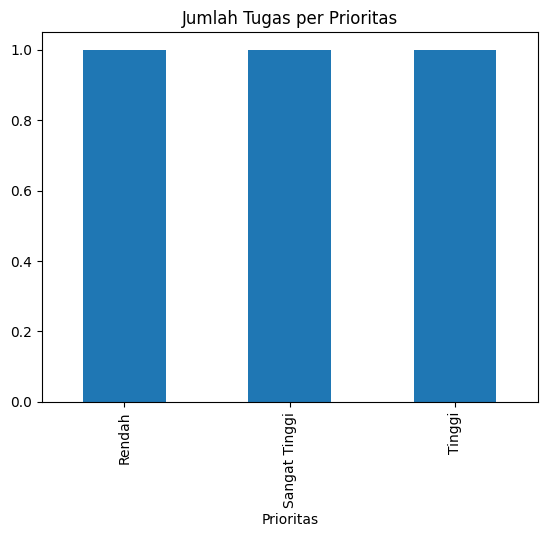


🎯 Rekomendasi Hari Ini:
Fokus dulu pada tugas: 'Tugas 1' (PDV) dengan prioritas Sangat Tinggi.

📈 Analisis Learning Agent:
⚠️ Kamu sering menunda tugas. Fokuslah ke tugas berprioritas tinggi! (Selesai: 1/3)


In [ ]:
if not df.empty:
    print("\n📊 Distribusi Prioritas:")
    df["Prioritas"].value_counts().plot(kind="bar", title="Jumlah Tugas per Prioritas")
    plt.show()

    # Rekomendasi (goal-based)
    df_aktif = df[df["Status"] == "Belum"]
    if not df_aktif.empty:
        tugas_fokus = df_aktif.sort_values(by="Prioritas", ascending=True).iloc[0]
        print(f"\n🎯 Rekomendasi Hari Ini:")
        print(f"Fokus dulu pada tugas: '{tugas_fokus['Tugas']}' ({tugas_fokus['Mata Kuliah']}) "
              f"dengan prioritas {tugas_fokus['Prioritas']}.")
    else:
        print("🎉 Semua tugas sudah selesai!")

    # Feedback learning
    print("\n📈 Analisis Learning Agent:")
    print(evaluasi_feedback(df))
else:
    print("Belum ada data untuk divisualisasikan.")